In [5]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import iqr

In [6]:
df= pd.read_csv('C:/Users/ptah/Desktop/DATA S n A/Dataset   IT/IT Salary Survey EU  2020.csv')
print(df)

                Timestamp   Age Gender         City  \
0     24/11/2020 11:14:15  26.0   Male       Munich   
1     24/11/2020 11:14:16  26.0   Male       Berlin   
2     24/11/2020 11:14:21  29.0   Male       Berlin   
3     24/11/2020 11:15:24  28.0   Male       Berlin   
4     24/11/2020 11:15:46  37.0   Male       Berlin   
...                   ...   ...    ...          ...   
1248  18/01/2021 15:05:50  31.0   Male       Berlin   
1249  18/01/2021 17:46:02  33.0   Male       Berlin   
1250  18/01/2021 23:20:35  39.0   Male       Munich   
1251  19/01/2021 10:17:58  26.0   Male  Saarbrücken   
1252  19/01/2021 12:01:11  26.0   Male       Berlin   

                                   Position  Total years of experience  \
0                          Software Engineer                         5   
1                          Backend Developer                         7   
2                          Software Engineer                        12   
3                         Frontend Develope

In [7]:
#clean data
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [8]:
#renaming columns
df.columns = ["Year", "Age", "Gender","City","Position","Years of experience","Germany Experience","Seniority level","Tech program language",
                       "Other Language","Yearly salary","Yearly bonus and stocks", "Salary one year ago","Bonus and stocks last year","Vacation days",
                       "Employment_status","Сontract_duration","Language","Company size","Company type","Job loss COVID","Kurzarbeit","Monetary Support"]

df.columns = df.columns.str.replace(' ', '_')

In [9]:
#deleting unwanted columns
del df['Germany_Experience']
del df['Other_Language']
del df['Employment_status']
del df['Сontract_duration']

In [10]:
df.shape

(1253, 19)

In [11]:
df.isna().sum()

Year                            0
Age                            27
Gender                         10
City                            0
Position                        6
Years_of_experience            16
Seniority_level                12
Tech_program_language         127
Yearly_salary                   0
Yearly_bonus_and_stocks       424
Salary_one_year_ago           368
Bonus_and_stocks_last_year    639
Vacation_days                  68
Language                       16
Company_size                   18
Company_type                   25
Job_loss_COVID                 20
Kurzarbeit                    880
Monetary_Support              791
dtype: int64

In [12]:
#missing and duplicate values
df=df.dropna(subset=['Age','Gender','Position','Years_of_experience','Seniority_level','Salary_one_year_ago','Language']) 
df=df.drop_duplicates()

In [16]:
df.isna().sum()

Year                            0
Age                             0
Gender                          0
City                            0
Position                        0
Years_of_experience             0
Seniority_level                 0
Tech_program_language          70
Yearly_salary                   0
Yearly_bonus_and_stocks       235
Salary_one_year_ago             0
Bonus_and_stocks_last_year    276
Vacation_days                  12
Language                        0
Company_size                    0
Company_type                    2
Job_loss_COVID                  2
Kurzarbeit                    575
Monetary_Support              511
dtype: int64

In [17]:
df['Year'] = pd.to_datetime(df['Year']).dt.year

In [20]:
df_filtered=df[df['Year']==2020]

In [21]:
df_filtered=df_filtered.replace({'City': {'ü': 'u', 'ö': 'o','ń':'n'}}, regex=True)
df_filtered['City'] = df_filtered['City'].str.title().str.strip()

df_filtered=df_filtered.replace({'City': {'Nurnberg': 'Nuremberg','Kiev': 'Kyiv','Koln':'Cologne','Den Haag':'The Haag',
                                                            'Cracovia':'Krakow','Bolingen':'Bollingen','Braunschweig':'Brunswick',
                                                            'Sevilla':'Seville','Saint-Petersburg':'Saint Petersburg','Dusseldurf':'Dusseldorf'}})

In [23]:
df_filtered['Position'] = df_filtered['Position'].str.title().str.strip()

counts_2020=df_filtered.Position.value_counts()
cutoff1=3
cutoff1_keep= list(counts_2020[counts_2020.values>=cutoff1].index)
df_filtered['Position'] = df_filtered['Position'].where(df_filtered['Position'].isin(cutoff1_keep), 'Other')

In [24]:
df_filtered.dtypes

Year                            int64
Age                           float64
Gender                         object
City                           object
Position                       object
Years_of_experience            object
Seniority_level                object
Tech_program_language          object
Yearly_salary                 float64
Yearly_bonus_and_stocks        object
Salary_one_year_ago           float64
Bonus_and_stocks_last_year     object
Vacation_days                  object
Language                       object
Company_size                   object
Company_type                   object
Job_loss_COVID                 object
Kurzarbeit                    float64
Monetary_Support               object
dtype: object

In [25]:
#clean years of experience
df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].astype(str)

df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].str.replace(r',', '.',regex=True)
df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].str.replace(r'6 \(not as a data scientist. but as a lab scientist\)',
                                                                                                    '6',regex=True)
df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].str.replace(r'15\. thereof 8 as CTO','15',regex=True)
df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].str.replace(r'1 \(as QA Engineer\) / 11 in total','11',regex=True)
df_filtered['Years_of_experience']=df_filtered['Years_of_experience'].str.replace(r'less than year','1',regex=True)         

df_filtered['Years_of_experience'] = pd.to_numeric(df_filtered['Years_of_experience'])

In [26]:
#seniority level
df_filtered['Seniority_level'] = df_filtered['Seniority_level'].str.title().str.strip()
df_filtered=df_filtered.replace({'Seniority_level': {'Lead': 'Senior','Head': 'Senior','Principal':'Senior','Student':'Junior',
                                                                       'Intern':'Junior','Working Student':'Junior','C-Level':'Senior',
                                                                       'No Idea, There Are No Ranges In The Firm':'Na','Director':'Senior',
                                                                       'C-Level Executive Manager':'Senior','Key': 'Na','No Level':'Na','Cto':'Senior',
                                                                       'Work Center Manager':'Senior','Manager':'Senior','Vp':'Senior',
                                                                       'Entry Level':'Junior'}})

In [27]:
#tech language
df_filtered['Tech_program_language'] = df_filtered['Tech_program_language'].str.title().str.strip()

In [28]:
#filter salary range
df_filtered = df_filtered.drop(df_filtered[df_filtered.Yearly_salary > 500000].index)

In [29]:
#remove extreme salaries
df_filtered = df_filtered.drop(df_filtered[df_filtered.Salary_one_year_ago > 500000].index)

In [30]:
#vacation days
df_filtered['Vacation_days'] = df_filtered['Vacation_days'].str.title().str.strip()
df_filtered=df_filtered.replace({'Vacation_days': {'23+': '23','24 Labour Days': '24','~25':'25',
                                                                     '30 In Contract (But Theoretically Unlimited)':'365',
                                                                     'Unlimited':'365','(No Idea)':'Na'}})

In [31]:
#clean language column
df_filtered['Language'] = df_filtered['Language'].str.replace('Deutsch', 'German')
df_filtered=df_filtered.replace({'Language': {'English and German': 'Multiple', 'Русский': 'Russian','50/50':'Multiple',
                                                                'Deuglisch':'German','both':'Multiple','Russian, English':'Multiple'}})

In [32]:
#clean covid column
df_filtered=df_filtered.replace({'Job_loss_COVID': {'i didn\'t but will be looking for new one because of covid': 'No',
                                                                      'kurzarbeitzeit for 1.5 months': 'No',
                                                                      'Lost the job but for different reason':'No',
                                                                      'yes but found a new one with better pay / perks':'Yes',
                                                                      'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
                                                                      'Leads and project inquiries have slowed down':'No',
                                                                      'Have been a freelancer at the beginning of year':'Yes',
                                                                       'Laid off for a bit':'Laid Off'}})

In [33]:
#clean monetary support
df_filtered['Monetary_Support'] = df_filtered['Monetary_Support'].str.title().str.strip()

Monetary_2020=df_filtered.Monetary_Support.value_counts()
cutoff2=3
cutoff2_keep= list(Monetary_2020[Monetary_2020.values>=cutoff2].index)
df_filtered['Monetary_Support'] = df_filtered['Monetary_Support'].where(df_filtered['Monetary_Support'].isin(cutoff2_keep), 'Other')

In [34]:
df_filtered.shape

(830, 19)

In [35]:
df_filtered.describe().round()

,Year,Age,Years_of_experience,Yearly_salary,Salary_one_year_ago,Kurzarbeit
count,830.0,830.0,830.0,830.0,830.0,274.0
mean,2020.0,33.0,9.0,72557.0,66156.0,13.0
std,0.0,5.0,5.0,22423.0,20850.0,16.0
min,2020.0,22.0,0.0,12000.0,11000.0,0.0
25%,2020.0,29.0,5.0,60000.0,55000.0,0.0
50%,2020.0,32.0,9.0,70000.0,65000.0,0.0
75%,2020.0,36.0,12.0,80000.0,75000.0,30.0
max,2020.0,66.0,40.0,250000.0,230000.0,40.0


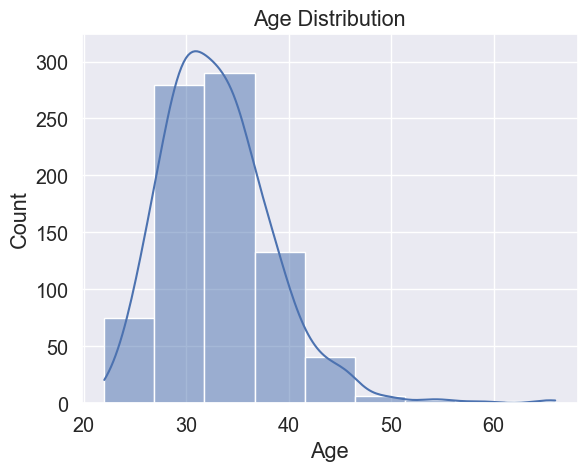

Age Descriptive Statistics


count    830.0
mean      33.0
std        5.0
min       22.0
25%       29.0
50%       32.0
75%       36.0
max       66.0
Name: Age, dtype: float64

In [37]:
#distribution of Ages
sns.set(font_scale=1.3)
plot=sns.histplot(df_filtered.Age,bins=9,kde=True)
plt.title('Age Distribution')
plt.show()

print('Age Descriptive Statistics')
df_filtered['Age'].describe().round()

In [38]:
#years of experience
#seniority level
level_agg = df_filtered.groupby('Seniority_level').agg(Median_ye=('Years_of_experience', 'median'),
                                                                IQR=('Years_of_experience', iqr)).reset_index()
level_agg.drop([2], axis=0, inplace=True)

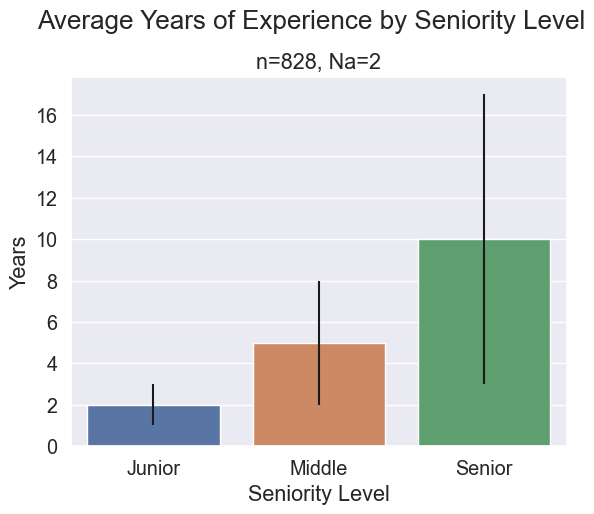

,Seniority_level,Median_ye,IQR
0,Junior,2.0,1.0
1,Middle,5.0,3.0
3,Senior,10.0,7.0


In [39]:
iqr=level_agg["IQR"]
sns.barplot(data=level_agg, x="Seniority_level", y="Median_ye", yerr=iqr)
plt.suptitle("Average Years of Experience by Seniority Level",y=1.02)
plt.title('n=828, Na=2')
plt.ylabel('Years')
plt.xlabel('Seniority Level')
plt.show()

level_agg

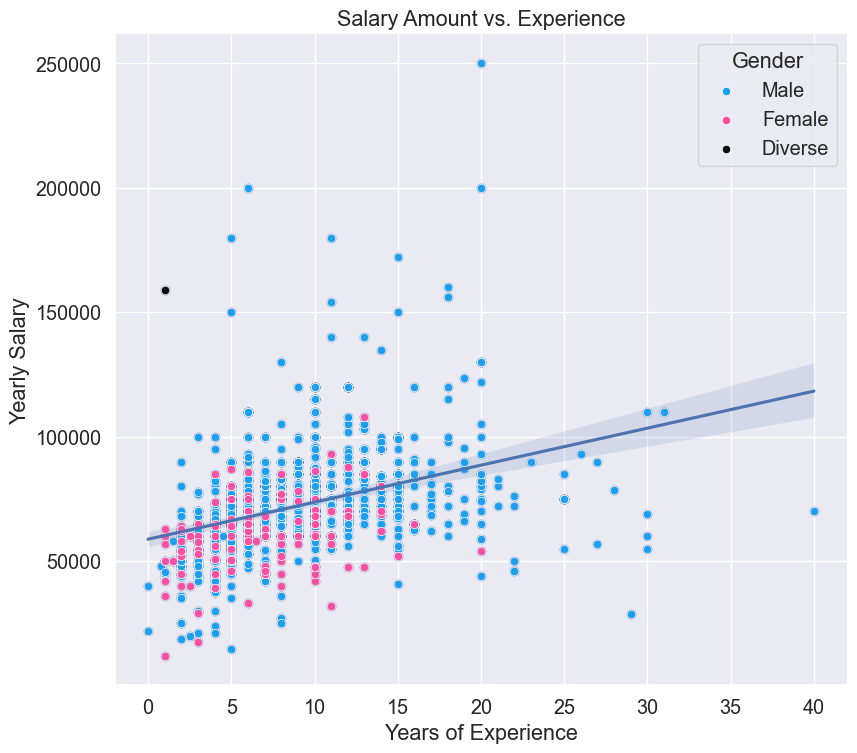

In [40]:
#years of experience vs salary
g = sns.FacetGrid(df_filtered,hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"])
sns.regplot(x='Years_of_experience', y="Yearly_salary", data=df_filtered)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000])
g.fig.set_figwidth(15)
g.fig.set_figheight(10)

g.axes[0,0].set_ylabel('Yearly Salary')
g.axes[0,0].set_xlabel('Years of Experience')
plt.title('Salary Amount vs. Experience')
plt.legend (title='Gender')
plt.show()


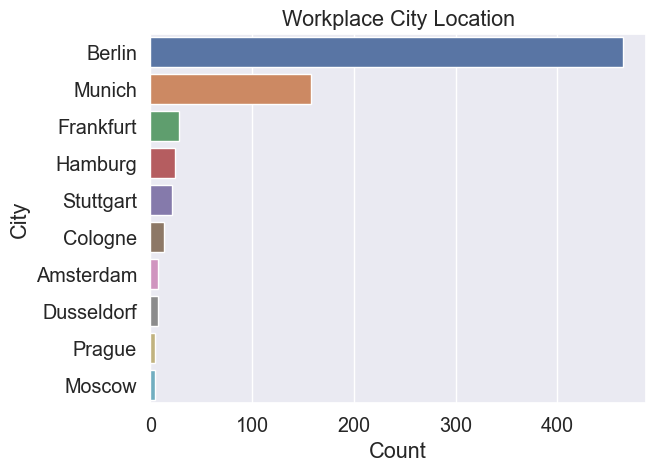

In [41]:
#city participants
city10=df_filtered.City.value_counts().iloc[:10].to_frame().reset_index()
city10=city10.rename(columns={"index": "City", "City": "Count"})

sns.barplot(x=city10["Count"],y=city10["City"])
plt.title('Workplace City Location')
plt.show()

In [42]:
#language used
language=df_filtered.Language.value_counts()
print('Percentage of Participants Spoken Language')
x=(language/language.sum())*100
round(x,2)

Percentage of Participants Spoken Language


English     80.96
German      16.63
Russian      1.08
Multiple     0.36
Italian      0.36
Czech        0.24
Spanish      0.24
Polish       0.12
Name: Language, dtype: float64

In [43]:
position=df_filtered.Position.value_counts().reset_index().iloc[:11]
position=position.rename(columns={"index": "Position", "Position": "Count"})
position.drop([2], axis=0, inplace=True)

top10=[]
for x in position['Position']:
     if x not in top10:
        top10.append(x)
        
rslt_df = df_filtered[df_filtered['Position'].isin(top10)] 

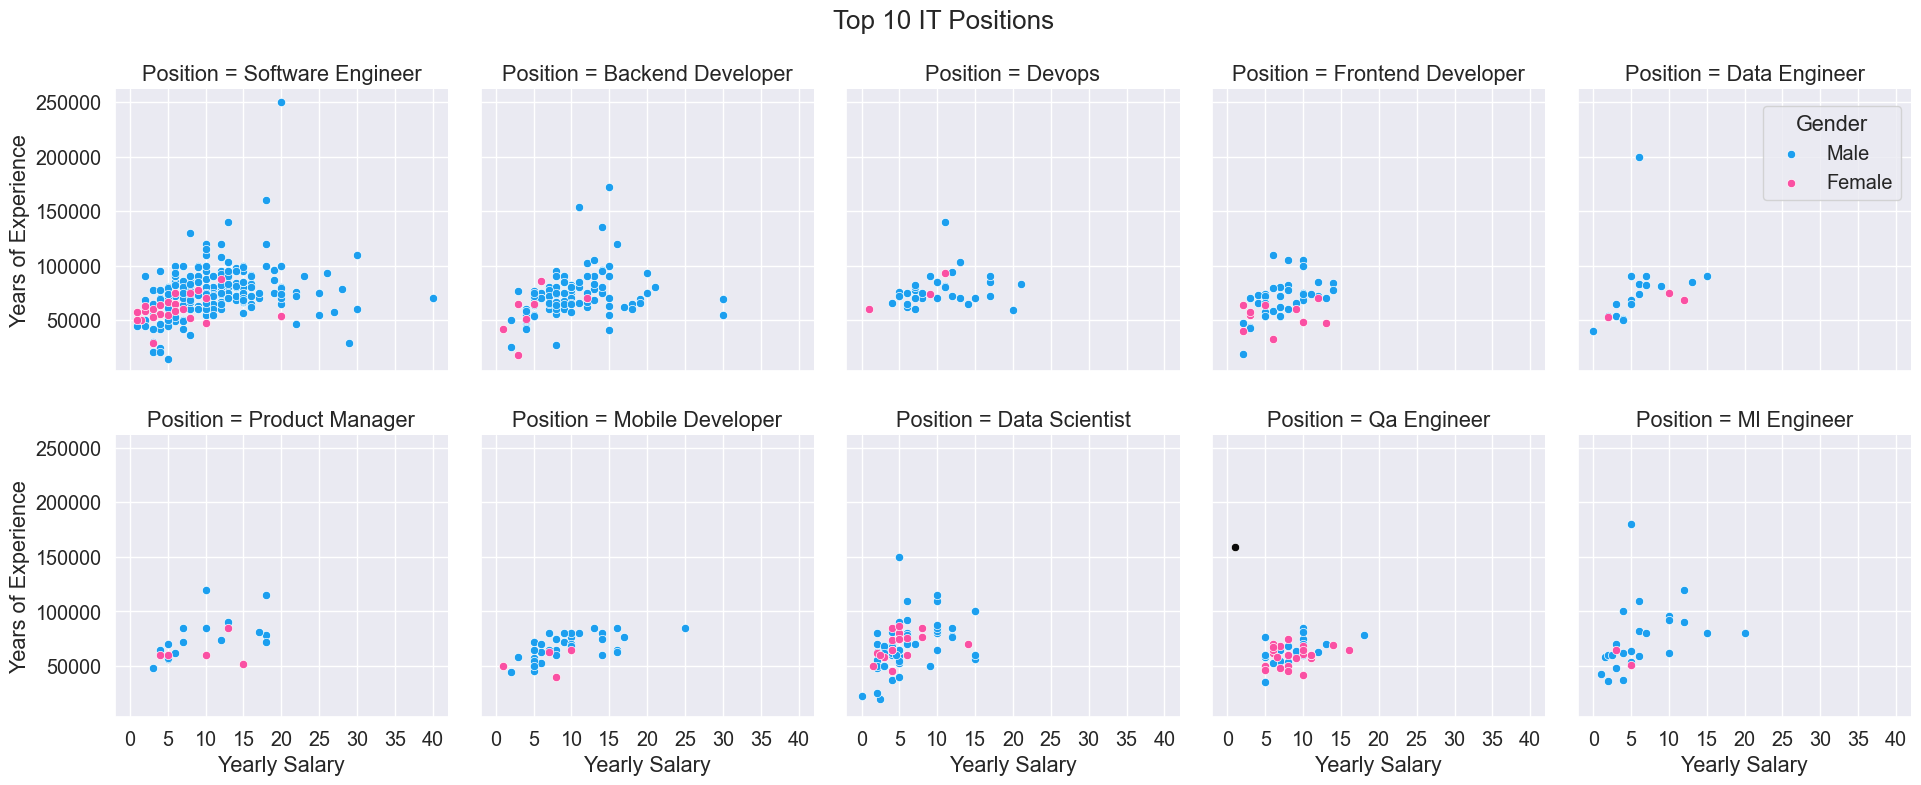

In [44]:
g = sns.FacetGrid(rslt_df, col='Position', hue='Gender',palette=["#1C9FEF", "#FA50A3", "#0C0B0B"],col_wrap=5,)
g=g.map(sns.scatterplot,'Years_of_experience',"Yearly_salary")
g.set(xticks=[0,5, 10,15,20,25,30,35,40], yticks=[50000, 100000, 150000,200000,250000],xlabel='Yearly Salary', ylabel='Years of Experience')
g.fig.set_figwidth(20)
g.fig.set_figheight(8)
plt.suptitle('Top 10 IT Positions',y=1.02)
plt.legend (loc='upper right',title='Gender',bbox_to_anchor=(1,2.2))

plt.show()

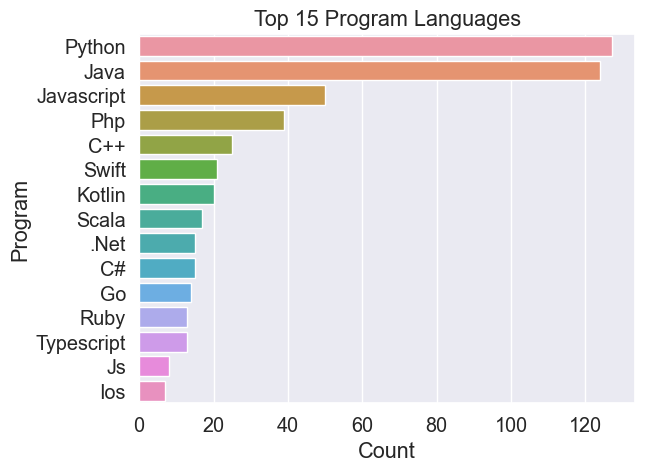

In [45]:
program=rslt_df["Tech_program_language"].value_counts().iloc[:15].reset_index()
program=program.rename(columns={"index": "Program", "Tech_program_language": "Count"})
sns.barplot(data=program, y="Program", x="Count")
plt.title('Top 15 Program Languages')
plt.show()

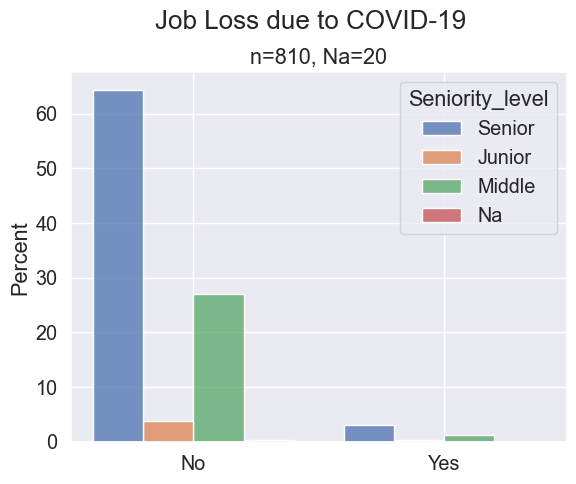

In [46]:
#job loss
sns.histplot(df_filtered, x="Job_loss_COVID", stat="percent", multiple="dodge", shrink=.8, hue='Seniority_level')
plt.suptitle('Job Loss due to COVID-19',y=1.01)
plt.title('n=810, Na=20')
plt.xlabel('')
plt.show()

In [48]:
---SUMMARY OF ANALYSIS
-The most popular positions in this data set were Software Engineer, Backend Developer, Devops, Frontend Developer, 
Data Engineer, Product Manager, Moblie Developer, Data Scientist, QA Engineer, and MI Engineer. 
The majority of these positions had a salary range from $50,000-\$100,000.

-Python and Java were by far the most popular programming languages.
Which are often used for software engineering a field 268 of the participants worked in

-As a result of the COVID-19 pandemic about 5% of participants lost their job while the majority were able to keep their job.
Kurzarbeit is a program where employers reduce their employees' working hours instead of laying them off. 
For the hours not worked the government typically provides 60% of their pay
. Most participants that were on Kurzarbeit had the hours reduced by at least 20.

-On average junior level employees have about 1 year of experience, mid level employees have 5 years,
and senior level employees have 10. Senior level employees range the most in years of exeperience.

SyntaxError: invalid syntax (1566955760.py, line 1)

In [ ]:
#reference
https://www.kaggle.com/datasets/parulpandey/2020-it-salary-survey-for-eu-region